<a href="https://colab.research.google.com/github/xunzxe/first-repository/blob/master/Datathon/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국가와 종목을 입력했을 때, 다음 올림픽에서 메달 획득 여부를 예측하는 모델
---

## STEP 1. 데이터 불러오기
---

In [1]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# athlete 데이터셋 pandas로 불러오기
athlete_path = "/content/athlete_events.csv"
athlete_data = pd.read_csv(athlete_path)
athlete = athlete_data.copy()
print(athlete.shape)
athlete.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [40]:
# region 데이터셋 pandas로 불러오기
regions_path = "/content/noc_regions.csv"
regions_data = pd.read_csv(regions_path)
regions = regions_data.copy()
print(regions.shape)
regions_data.head()

(230, 3)


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [41]:
# 데이터 합치기
data = athlete.merge(regions, how="left", on="NOC")
print(data.shape)
data.head()

(271116, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


- 데이터 : 206개국, 271,116명
  - 하계 올림픽 : 206개국, 222,552명
  - 동계 올림픽 : 111개국, 48,564명

In [42]:
# 'Medal' 데이터 전처리하기
data['Medal'].fillna('No', inplace=True)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN


## STEP 2. 데이터 살펴보기
---

In [45]:
# 빈 데이터 확인하기
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       370
notes     266077
dtype: int64

In [46]:
# 'region'칼럼에서 결측치 제거하기
data.dropna(subset=['region'], inplace=True)
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9460
Height     60078
Weight     62782
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region         0
notes     265728
dtype: int64

In [47]:
# 데이터 확인하기
print("국가 :",len(set(data["region"])))
regions = list(set(data["region"]))
print(regions)
print()

print("종목 :",len(set(data["Sport"])))
print("하계 종목 :",len(set(summer["Sport"])))
print("동계 종목 :",len(set(winter["Sport"])))
Sports = list(set(data["Sport"]))
print(Sports)
intersection = set(summer["Sport"])&set(winter["Sport"])
print(intersection)
print()

print("메달 :",len(set(data["Medal"])))
medals = list(set(data["Medal"]))
print(medals)
print()

print("년도 :",len(set(data["Year"])))
medals = list(set(data["Year"]))
print(medals)

국가 : 205
['Mongolia', 'Hungary', 'Qatar', 'Trinidad', 'Japan', 'Mali', 'Portugal', 'Bulgaria', 'Bermuda', 'Syria', 'Switzerland', 'Virgin Islands, US', 'Sri Lanka', 'Guinea', 'Italy', 'Cameroon', 'Tunisia', 'Papua New Guinea', 'Norway', 'Honduras', 'Kosovo', 'Chile', 'Afghanistan', 'Democratic Republic of the Congo', 'Tonga', 'Panama', 'Namibia', 'Micronesia', 'Yemen', 'Iceland', 'Laos', 'New Zealand', 'Finland', 'Thailand', 'Aruba', 'Saint Vincent', 'Vietnam', 'Ghana', 'Palau', 'Slovakia', 'Serbia', 'Sierra Leone', 'Fiji', 'Venezuela', 'Jamaica', 'Nicaragua', 'Puerto Rico', 'Armenia', 'Romania', 'Albania', 'Mauritania', 'Latvia', 'Malaysia', 'Sao Tome and Principe', 'Gabon', 'Morocco', 'El Salvador', 'Iraq', 'Nepal', 'Chad', 'Ivory Coast', 'Cuba', 'Slovenia', 'South Korea', 'Iran', 'Myanmar', 'Vanuatu', 'Lesotho', 'Angola', 'Spain', 'Malta', 'Kenya', 'Brunei', 'South Africa', 'Brazil', 'Nigeria', 'Kuwait', 'Suriname', 'Guinea-Bissau', 'Sudan', 'Turkey', 'Saudi Arabia', 'Mauritius', 'A

- 올림픽 참여 국가 : 205개국
- 올림픽 종목 : 66종목
  - 하계 올림픽 종목 : 52종목
    - Figure Skating : 1908년과 1920년에는 하계 올림픽으로 개최.
    - Ice Hockey : 1920년 앤트워프 하계 올림픽으로 데뷔. 이후 1924년에 동계 올림픽 프로그램으로 변경
    - Alpinism : 1932, 1936년 하계 올림픽으로 개최.
  - 동계 올림픽 종목 : 17종목
- 올림픽 개최 횟수 : 35번 (~2016년까지)

In [55]:
# 하계 올림픽 데이터셋 만들기
summer = data[data["Season"] == "Summer"].reset_index(drop=True)
print(summer.shape)
print(len(set(summer["region"])))
summer.head()

(222182, 17)
205


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No,Netherlands,NaN


In [56]:
# 동계 올림픽 데이터셋 만들기
winter = data[data["Season"] == "Winter"].reset_index(drop=True)
print(winter.shape)
print(len(set(winter["region"])))
winter.head()

(48564, 17)
111


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,Netherlands,NaN
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No,Netherlands,NaN
4,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN


## STEP 3. 데이터 전처리하기
---

### STEP 3-1. RATIO
- Ratio 값이 클수록 2020 하계 올림픽에서 메달을 획득할 가능성이 높다.
  - Ratio = 메달 획득한 횟수 / 전체 참가 횟수

In [145]:
# Ratio 칼럼 생성하기
summer_summary = summer.pivot_table(index=["region","Sport"], columns="Medal", values="Name", aggfunc="count", fill_value=0).reset_index()
summer_summary['Total'] = summer_summary['Gold'] + summer_summary['Silver'] + summer_summary['Bronze']
summer_summary['Ratio'] = summer_summary['Total'] / (summer_summary['Total'] + summer_summary['No'])
summer_summary = summer_summary[summer_summary['Ratio'] != 0]
print(len(summer_summary))
summer_summary.sort_values(by=['Ratio','region'], ascending=False).head(50)

1092


Medal,region,Sport,Bronze,Gold,No,Silver,Total,Ratio
2895,Ukraine,Handball,15,0,0,0,15,1.000000
2835,USA,Basketball,36,281,0,24,341,1.000000
2849,USA,Ice Hockey,0,0,0,11,11,1.000000
2852,USA,Lacrosse,0,0,0,12,12,1.000000
2854,USA,Polo,5,2,0,5,12,1.000000
2858,USA,Rugby,0,36,0,0,36,1.000000
2862,USA,Softball,0,45,0,15,60,1.000000
2794,UK,Cricket,0,12,0,9,21,1.000000
2807,UK,Lacrosse,0,0,0,12,12,1.000000
2810,UK,Polo,5,11,0,14,30,1.000000


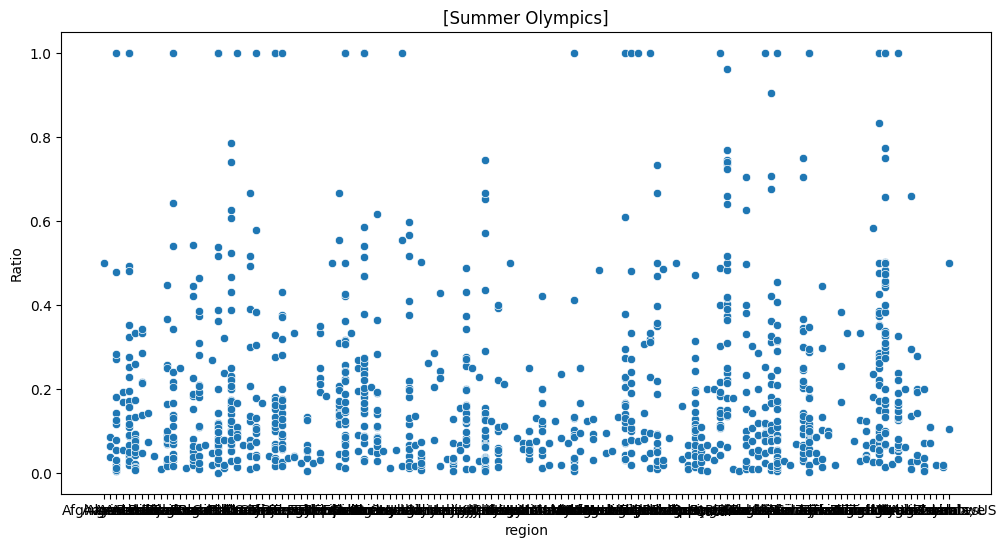

In [58]:
# 국가별 Ratio 값에 따른 분포 plot
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.scatterplot(data=summer_summary, x="region", y="Ratio", ax=ax)
plt.title("[Summer Olympics]")
plt.show()

## STEP 3-2. RECENT
- Recent 값이 True이면 2020 하계 올림픽에서 메달을 획득할 가능성이 높다.
  - Recent : 2012년과 2016년에 모두 메달을 획득한 경우 True, 그렇지 못한 경우 False

In [77]:
# 데이터셋 만들기
summer_recent = summer[['region', 'Sport','Year','Medal']]

# 메달 획득 여부를 숫자로 변환 (금: 3, 은: 2, 동: 1, 노메달: 0)
medal_mapping = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'No': 0}
summer_recent['Medal'] = summer_recent['Medal'].map(medal_mapping)

summer_recent.head()

<ipython-input-77-79638351002c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_recent['Medal'] = summer_recent['Medal'].map(medal_mapping)


,region,Sport,Year,Medal
0,China,Basketball,1992,0
1,China,Judo,2012,0
2,Denmark,Football,1920,0
3,Denmark,Tug-Of-War,1900,3
4,Netherlands,Athletics,1932,0


In [78]:
# 2012년과 2016년 데이터만 필터링
summer_recent = summer_recent[summer_recent['Year'].isin([2012, 2016])]

# 'Medal' >= 1 이상인 데이터만 필터링
summer_recent = summer_recent[summer_recent['Medal'] >= 1]

# 나라 별로 정렬
summer_recent = summer_recent.sort_values(by=['region'])

print(len(summer_recent))
summer_recent.head(20)

3959


,region,Sport,Year,Medal
141369,Afghanistan,Taekwondo,2012,1
120568,Algeria,Athletics,2012,3
120569,Algeria,Athletics,2016,2
120570,Algeria,Athletics,2016,2
149431,Argentina,Hockey,2016,3
151691,Argentina,Hockey,2016,3
12823,Argentina,Hockey,2012,2
72967,Argentina,Hockey,2012,2
30030,Argentina,Sailing,2016,3
146480,Argentina,Hockey,2016,3


In [85]:
# 피벗 테이블 생성
recent_summary = summer_recent.pivot_table(index=['region', 'Sport'], columns='Year', values='Medal', aggfunc='count', fill_value=0)
recent_summary['Recent'] = True

recent_summary

Year                   2012  2016  Recent
region      Sport                        
Afghanistan Taekwondo     1     0    True
Algeria     Athletics     1     2    True
Argentina   Hockey       15    18    True
            Judo          0     1    True
            Sailing       2     2    True
...                     ...   ...     ...
Venezuela   Athletics     0     1    True
            Boxing        0     1    True
            Cycling       0     1    True
            Fencing       1     0    True
Vietnam     Shooting      0     2    True

[550 rows x 3 columns]

## STEP 4. 모델 만들기
---

In [132]:
# 데이터셋 만들기

model_merge = pd.merge(summer_summary, recent_summary, on=['region', 'Sport'],how='left')
model_data = model_merge[['region','Sport','Recent','Ratio']]
model_data['Recent'] = model_data['Recent'].fillna(False)
model_data['Ratio'] = model_data['Ratio'] >= 0.9
print(len(model_data))
model_data.head(30)

1092


<ipython-input-132-bd1e4c862736>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Recent'] = model_data['Recent'].fillna(False)
<ipython-input-132-bd1e4c862736>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Ratio'] = model_data['Ratio'] >= 0.9


,region,Sport,Recent,Ratio
0,Afghanistan,Taekwondo,True,False
1,Algeria,Athletics,True,False
2,Algeria,Boxing,False,False
3,Algeria,Judo,False,False
4,Argentina,Athletics,False,False
5,Argentina,Basketball,False,False
6,Argentina,Boxing,False,False
7,Argentina,Cycling,False,False
8,Argentina,Equestrianism,False,False
9,Argentina,Fencing,False,False


In [126]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [133]:
# 레이블 인코딩 (숫자로 변환)
le_region = LabelEncoder()
le_sport = LabelEncoder()

model_data['region'] = le_region.fit_transform(model_data['region'])
model_data['Sport'] = le_sport.fit_transform(model_data['Sport'])

# 특징과 레이블 분리
X = model_data[['region', 'Sport']]
y = model_data['Ratio']

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

<ipython-input-133-f6c57ea175d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['region'] = le_region.fit_transform(model_data['region'])
<ipython-input-133-f6c57ea175d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Sport'] = le_sport.fit_transform(model_data['Sport'])


RandomForestClassifier(random_state=42)

In [134]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9315068493150684
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       205
        True       0.33      0.07      0.12        14

    accuracy                           0.93       219
   macro avg       0.64      0.53      0.54       219
weighted avg       0.90      0.93      0.91       219



In [147]:
# 새로운 입력 데이터
new_data = pd.DataFrame({
    'region': ['China', 'UK'],
    'Sport': ['Judo', 'Alpinism'],
})

# 새로운 데이터를 인코딩하는 함수
def encode_new_data(new_data, le_region, le_sport):
    # 인코딩할 데이터프레임 복사
    new_data_encoded = new_data.copy()

    # region 인코딩
    new_data_encoded['region'] = new_data_encoded['region'].apply(lambda x: le_region.transform([x])[0] if x in le_region.classes_ else -1)

    # Sport 인코딩
    new_data_encoded['Sport'] = new_data_encoded['Sport'].apply(lambda x: le_sport.transform([x])[0] if x in le_sport.classes_ else -1)

    return new_data_encoded

# 인코딩
new_data_encoded = encode_new_data(new_data, le_region, le_sport)

# 예측
predictions = model.predict(new_data_encoded)

# 예측 결과 추가
new_data['Medal'] = predictions
new_data

,region,Sport,Medal
0,China,Judo,False
1,UK,Alpinism,True
